# Math 300:Recitation 7

# Problem 3.5.1

Determine the natural cubic spline $S$ that interpolates the data $f(0) = 0$, $f(1) = 1$, and $f(2) = 2$.

## Solution: 

On $[0, 1]$ we will have a cubic polynomial $\newline \newline$
$$
S_{0}(x) = a_{0} + b_{0}x + c_{0}x^{2} + d_{0}x^{3},
\newline
$$
and we will have a similar cubic polynomial on $[1, 2]$: $\newline \newline$
$$
S_{1}(x) = a_{1} + b_{1}(x - 1) + c_{1}(x - 1)^{2} + d_{1}(x - 1)^{3}
\newline
$$
There are eight unknowns $\{a_{0}, b_{0}, c_{0}, d_{0}, a_{1}, b_{1}, c_{1}, d_{1}\}$, so we need eight linear equations to be able to solve for them. Four equations are obvious from the interpolation requirement: $\newline \newline$
$$
\begin{align*}
    S_{0}(0) = 0 &\implies a_{0} = 0, \\
    S_{0}(1) = 1 &\implies a_{0} + b_{0} + c_{0} + d_{0} = 1, \\
    S_{1}(1) = 1 &\implies a_{1} = 1, \\
    S_{1}(2) = 2 &\implies a_{1} + b_{1} + c_{1} + d_{1} = 2.
\end{align*}
\newline
$$
The other four come from restrictions on the derivatives of the cubic spline. Two come from the fact that the spline's first and second derivatives must match on the interior nodes: $\newline \newline$
$$
\begin{align*}
    S_{0}'(1) = S_{1}'(1) &\implies b_{0} + 2c_{0} + 3d_{0} - b_{1} = 0, \\
    S_{0}''(1) = S_{1}''(1) &\implies 2c_{0} + 6d_{0} - 2c_{1} = 0.
\end{align*}
\newline
$$
The final two equations come from the fact that since we have a natural spline, we assert that the second derivative at the outer edges is zero: $\newline \newline$
$$
\begin{align*}
    S_{0}''(0) = 0 &\implies 2c_{0} = 0, \\
    S_{1}''(2) = 0 &\implies 2c_{1} + 6d_{1} = 0.
\end{align*}
\newline
$$
We now have eight linear equations in eight unknowns, so we package this as a solution to a linear system as follows: Solve for $\mathbf{x}$ in $\newline \newline$
$$
\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\
    0 & 1 & 2 & 3 & 0 & -1 & 0 & 0 \\
    0 & 0 & 2 & 6 & 0 & 0 & -2 & 0 \\
    0 & 0 & 2 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 2 & 6 \\
\end{bmatrix}
\mathbf{x} =
\begin{bmatrix}
    0 \\
    1 \\
    1 \\
    2 \\
    0 \\
    0 \\
    0 \\
    0
\end{bmatrix}.
\newline
$$
A tedious (but doable) computation shows that $\newline \newline$
$$
\mathbf{x} = 
\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    1 \\
    1 \\
    0 \\
    0
\end{bmatrix}.
$$
Therefore, $S_{0}(x) = x$ and $S_{1}(x) = x$.

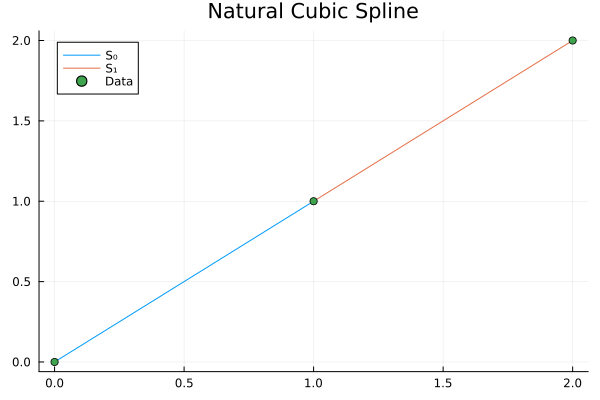

In [3]:
using Plots
data = [(0, 0), (1, 1), (2, 2)]
xs_first = 0:0.01:1
xs_second = 1:0.01:2
S₀(x) = x
S₁(x) = x
plot(xs_first, S₀.(xs_first), label = "S₀", title = "Natural Cubic Spline", legend = :topleft)
plot!(xs_second, S₁.(xs_second), label = "S₁")
scatter!(data, label = "Data")

# Problem 3.5.2

Determine the clamped cubic spline $S$ that interpolates the data $f(0) = 0$, $f(1) = 1$, and $f(2) = 2$ and satisfies $S'(0) = S'(2) = 1$.

If we set up the cubic splines in the same way as the last problem, all but the last two conditions stay the same. Given $\newline \newline$
$$
S_{0}(x) = a_{0} + b_{0}x + c_{0}x^{2} + d_{0}x^{3},
\newline
$$
on $[0, 1]$ and
$$
S_{1}(x) = a_{1} + b_{1}(x - 1) + c_{1}(x - 1)^{2} + d_{1}(x - 1)^{3}
\newline
$$
on $[1, 2]$, we have $\newline \newline$
$$
\begin{align*}
    S_{0}(0) = 0 &\implies a_{0} = 0, \\
    S_{0}(1) = 1 &\implies a_{0} + b_{0} + c_{0} + d_{0} = 1, \\
    S_{1}(1) = 1 &\implies a_{1} = 1, \\
    S_{1}(2) = 2 &\implies a_{1} + b_{1} + c_{1} + d_{1} = 2
\end{align*}
\newline
$$
and $\newline \newline$
$$
\begin{align*}
    S_{0}'(1) = S_{1}'(1) &\implies b_{0} + 2c_{0} + 3d_{0} - b_{1} = 0, \\
    S_{0}''(1) = S_{1}''(1) &\implies 2c_{0} + 6d_{0} - 2c_{1} = 0,
\end{align*}
\newline
$$
as before. However, now we have the conditions on the first derivative at the outer nodes, which make this a clamped spline: $\newline \newline$
$$
\begin{align*}
    S_{0}'(0) = 1 &\implies b_{0} = 1, \\
    S_{1}'(2) = 1 &\implies b_{1} + 2c_{1} + 3d_{1} = 1.
\end{align*}
\newline
$$
Now, our linear system becomes $\newline \newline$
$$
\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\
    0 & 1 & 2 & 3 & 0 & -1 & 0 & 0 \\
    0 & 0 & 2 & 6 & 0 & 0 & -2 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 2 & 3 \\
\end{bmatrix}
\mathbf{x} =
\begin{bmatrix}
    0 \\
    1 \\
    1 \\
    2 \\
    0 \\
    0 \\
    1 \\
    1
\end{bmatrix}.
\newline
$$
Unsurprisingly, we get the same vector $\mathbf{x}$ as before, leading to the solution $S_{0}(x) = x$ and $S_{1}(x) = x$.

# Problems 3.5.3b/3.5.5b

Construct the natural cubic spline for the following data:

| $x$ | $f(x)$ |
| --- | --- |
| $0.8$ | $0.22363362$ |
| $1.0$ | $0.65809197$ |

This data was generated using $f(x) = \sin(e^{x} - 2)$. Use the spline to approximate $f(0.9)$ and $f'(0.9)$, and then calculate the actual error.

## Solution:

Let $\newline \newline$
$$
S(x) = a + b(x - 0.8) + c(x - 0.8)^{2} + d(x - 0.8)^{3}.
\newline
$$
Then, the interpolation conditions give $\newline \newline$
$$
\begin{align*}
    S(0.8) = 0.22363362 &\implies a = 0.22363362, \\
    S(1) = 0.65809197 &\implies a + 0.2b + 0.04c + 0.008d = 0.65809197.
\end{align*}
\newline
$$
The natural boundary conditions are $\newline \newline$
$$
\begin{align*}
    S''(0.8) = 0 &\implies 2c = 0, \\
    S''(1) = 0 &\implies 2c + 1.2d = 0.
\end{align*}
\newline
$$
Therefore, our linear system is $\newline \newline$
$$
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 0.2 & 0.04 & 0.008 \\
    0 & 0 & 2 & 0 \\
    0 & 0 & 2 & 1.2 \\
\end{bmatrix}
\mathbf{x} =
\begin{bmatrix}
    0.22363362 \\
    0.65809197 \\
    0 \\
    0 
\end{bmatrix}.
\newline
$$
Solving, we get $\newline \newline$
$$
\mathbf{x} =
\begin{bmatrix}
    0.22363362 \\
    2.1364304 \\
    0 \\
    0
\end{bmatrix}
$$
This means our spline is $\newline \newline$
$$
S(x) = 0.22363362 + 2.17229175(x - 0.8) = 2.17229175x - 1.51419978.
\newline
$$

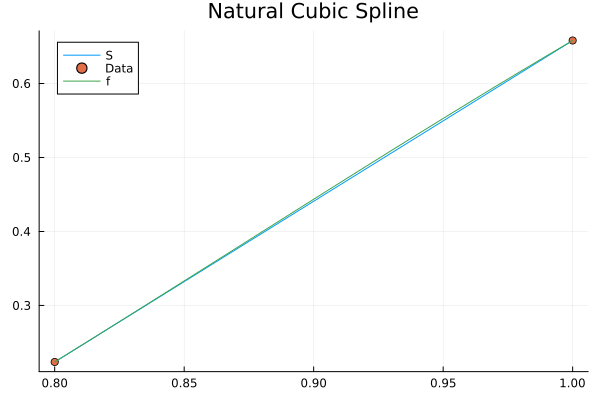

In [6]:
true_function = x -> sin(exp(x) - 2)

data = [(0.8, 0.22363362), (1., 0.65809197)]
xs = 0.8:0.01:1.
S(x) = 2.17229175*x - 1.51419978
plot(xs, S.(xs), label = "S", title = "Natural Cubic Spline", legend = :topleft)
scatter!(data, label = "Data")
f(x) = sin(exp(x) - 2)
plot!(xs, true_function.(xs), label = "f")

We see that the original function is very close to the spline approximation on the interval. We can easily compute the difference of the function values at $x = 0.9$:

In [7]:
abs(S(0.9) - f(0.9))

0.00272964377028162

To see the difference in the derivatives, note that $f'(x) = e^{x}\cos(e^{x} - 2)$ and $S'(x) = 2.17229175$:

In [8]:
f_prime(x) = exp(x)*cos(exp(x) - 2)
S_prime(x) = 2.17229175

abs(f_prime(0.9) - S_prime(0.9))

0.03207496435303536